In [ ]:
import tensorflow as tf

In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path

# Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data set to 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices
# Our labels are single values from 0 to 9.
# Instead, we want each label to be an array with on element set to 1 and and the rest set to 0.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape, 32*32*3

((50000, 32, 32, 3), 3072)

In [ ]:
model = None
model = keras.models.Sequential()
model.add(Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3),padding="same" , activation="relu"))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train,
          y_train,
          batch_size=32,
          epochs=30,
          validation_data=(x_test, y_test),
          shuffle=True)

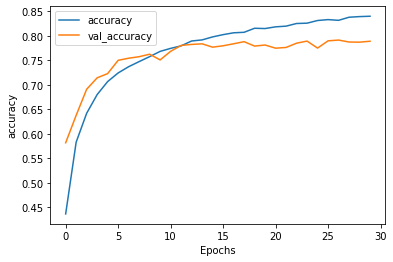

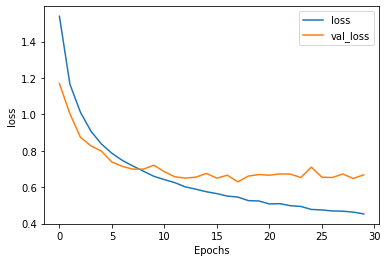

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
structure = model.to_json()
f = Path("model_structure.json")
f.write_text(structure)

4383

In [ ]:
model.save("model_weight.h5")

# Prediction


In [ ]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

In [ ]:
class_labels = [
    "Plane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

In [ ]:
path = Path("model_structure.json")
model_struct = path.read_text()

In [ ]:
#recreate model
p_model = model_from_json(model_struct)

In [ ]:
#reload model weight
p_model.load_weights("model_weight.h5")

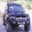

In [ ]:
img = image.load_img("car.png", target_size=(32,32))
img

In [ ]:
img_to_test = image.img_to_array(img) / 255

In [ ]:
list_of_images = np.expand_dims(img_to_test, axis=0)
list_of_images.shape

(1, 32, 32, 3)

In [ ]:
results = p_model.predict(list_of_images)

In [ ]:
single_result = results[0]
single_result

In [ ]:
predicted_class_index = int(np.argmax(single_result))
class_likelihood = single_result[predicted_class_index]
class_likelihood


0.41959327

In [ ]:
class_label = class_labels[predicted_class_index]
class_label

'Boat'